<a href="https://colab.research.google.com/github/Pavan3201DS/MLproject/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Reading the csv file
df= pd.read_csv("/content/Salary_Data.csv")

In [5]:
#checking first 5 rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
#checking statistical metrices
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


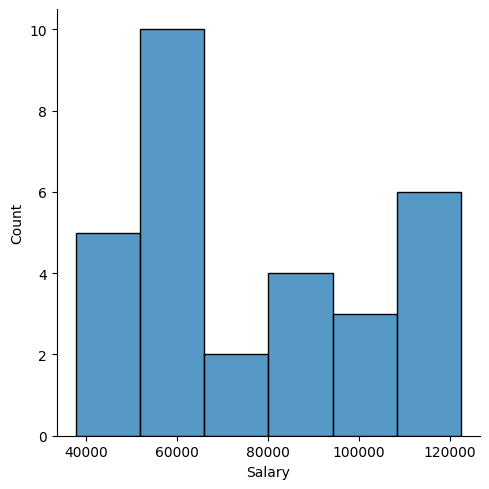

In [8]:
#checking the distribution of our dataset
sns.displot(df["Salary"])

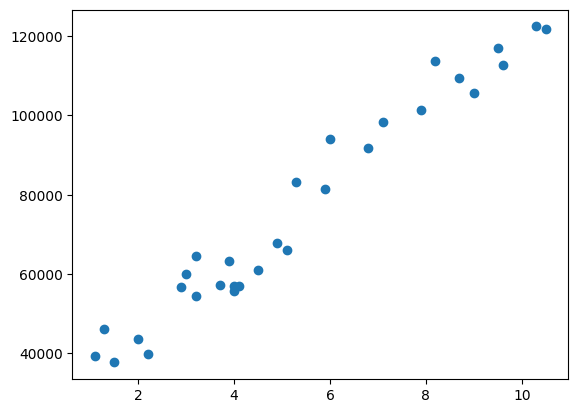

In [9]:
#Checking our feature has any positive or negative corelation
plt.scatter(df["YearsExperience"], df["Salary"])

Since, our plot is showing that number of experienced years and salary is highly positive corelated. so we can pedict the best fit line for the given dataset

In [10]:
# Creating independent variable(x) and depenent variable(y)
x= df[["YearsExperience"]]
y= df[["Salary"]]

In [11]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [12]:
#Importing essential libraries for splitting and implementing linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
#checking dimentions of splitting
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((21, 1), (9, 1), (21, 1), (9, 1))

In [15]:
#creading object instance
regressor= LinearRegression()

In [16]:
#calculating the required parameters(mu and sigma in this case) internally(no return).
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
#checking the intercept and slope(coefficient)
regressor.coef_, regressor.intercept_

(array([[9339.08172382]]), array([25918.43833489]))

In [18]:
#model pridiction
y_pred= regressor.predict(x_test)

Text(0, 0.5, 'Salary')

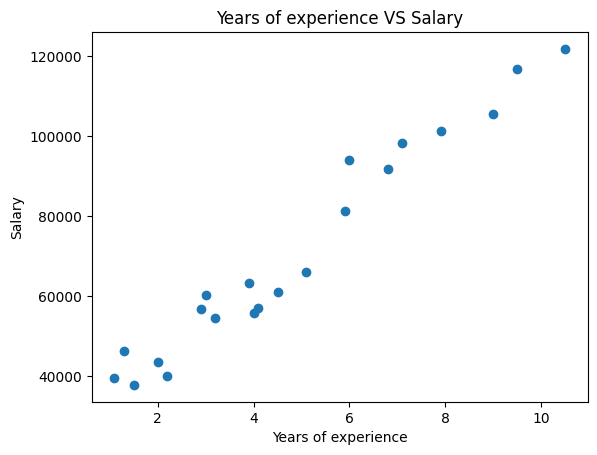

In [19]:
plt.scatter(x_train, y_train)
plt.title("Years of experience VS Salary")
plt.xlabel("Years of experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

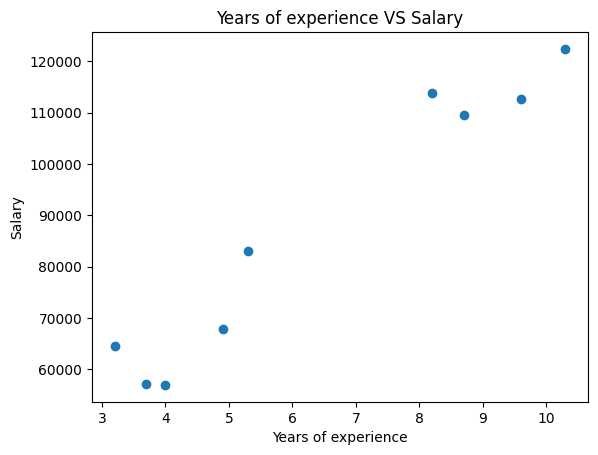

In [20]:
plt.scatter(x_test, y_test)
plt.title("Years of experience VS Salary")
plt.xlabel("Years of experience")
plt.ylabel("Salary")

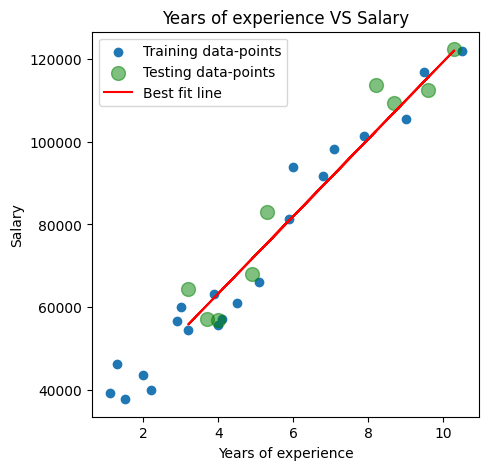

In [21]:
#3 in 1 plot for best fit line
plt.figure(figsize=(5,5))

plt.scatter(x_train, y_train, label="Training data-points")
plt.scatter(x_test, y_test, c= "green", alpha=0.5, s=100, label= "Testing data-points")
plt.plot(x_test, y_pred, "r-", label= "Best fit line")

plt.title("Years of experience VS Salary")
plt.xlabel("Years of experience")
plt.ylabel("Salary")

plt.legend()
plt.show()

Till now we have got some really amazing results. Let's check how accurate our results are.

In [22]:
#Importing required libraries to check the accuracy metrices
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_pred.shape

((21, 1), (21, 1), (9, 1), (9, 1), (9, 1))

In [24]:
#checking mean absolute error
mae= mean_absolute_error(y_test, y_pred)
print(mae)

5161.328710400183


In [25]:
#checking mean squared error
mse= mean_squared_error(y_test, y_pred)
print(mse)

37784662.46621314


In [26]:
#checking root mean squared error
rmse= np.sqrt(mse)
print(rmse)

6146.92300799458


In [27]:
#checking r2_score
r2= r2_score(y_test,y_pred)
print(r2)

0.9414466227178214


Since, r2 score is very close to 1(excellent accuracy). so, we can say that we can predict dependent variable(y)(Salary) from our independent variable(x)(YearsOfExperience).